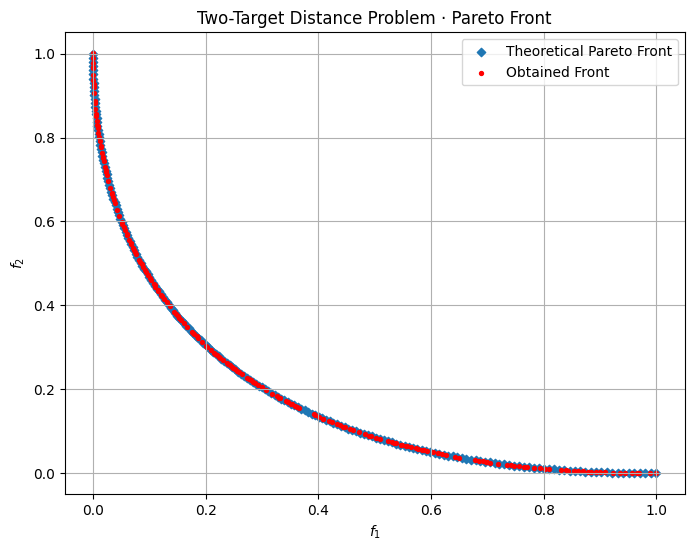

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from pymoors import (
    Nsga2,
    RandomSamplingFloat,
    GaussianMutation,
    SimulatedBinaryCrossover,
    CloseDuplicatesCleaner,
    Constraints
)
from pymoors.typing import TwoDArray


def fitness(genes: TwoDArray) -> TwoDArray:
    x1 = genes[:, 0]
    x2 = genes[:, 1]
    # Objective 1: Distance to (0,0)
    f1 = x1**2 + x2**2
    # Objective 2: Distance to (1,0)
    f2 = (x1 - 1) ** 2 + x2**2
    # Combine the two objectives into a single array
    return np.column_stack([f1, f2])


algorithm = Nsga2(
    sampler=RandomSamplingFloat(min=-2, max=2),
    crossover=SimulatedBinaryCrossover(distribution_index=15),
    mutation=GaussianMutation(gene_mutation_rate=0.1, sigma=0.01),
    fitness_fn=fitness,
    constraints_fn = Constraints(lower_bound = -2.0, upper_bound = 2.0),
    duplicates_cleaner=CloseDuplicatesCleaner(epsilon=1e-16),
    num_vars=2,
    population_size=200,
    num_offsprings=200,
    num_iterations=100,
    mutation_rate=0.2,
    crossover_rate=0.9,
    keep_infeasible=False,
    seed=42,
    verbose=False,
)

algorithm.run()
population = algorithm.population

# Plot the results
t = np.linspace(0.0, 1.0, 200)
f1_theo = t**2
f2_theo = (t - 1.0) ** 2


plt.figure(figsize=(8, 6))
plt.scatter(f1_theo, f2_theo, marker="D", s=18, label="Theoretical Pareto Front")
plt.scatter(
    population.fitness[:, 0],
    population.fitness[:, 1],
    c="r",
    s=8,
    marker="o",
    label="Obtained Front",
)
plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.title("Two-Target Distance Problem · Pareto Front")
plt.grid(True)
plt.legend()
plt.show()